# Notebook kelompok 4 kelas C2 angkatan 2020
1. Salsabila Kanaya (2001360)
2. Shafa Meira Wahyono (2007723)
3. Sri Nanda Ameliani (2008196)
4. Yosafat (2009929)

Pada tugas ini, kami menganalisa data penjualan video games pada tahun 1980-2016.

# Deskripsi Data

Dataset ini mengandung beberapa list video games dengan angka penjualan yang melebihi 100,000 unit. Dataset ini dihasilkan dari hasil scraping vgchartz.com

Atribut-atribut:
1. Rank - Ranking of sales
2. Name - Name video games
3. Platform - Platform of the games release (i.e. PC,PS4, etc.)
4. Year - Year of the game's release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.

Terakhir diambil pada tahun 2016.
The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

Sumber dataset: https://www.kaggle.com/gregorut/videogamesales

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("C:\\dataSet\\vgsales.csv") #sesuaikan path
df.head(5000)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
4995,4997,Peppa Pig: The Game,Wii,2009.0,Misc,Pinnacle,0.00,0.35,0.00,0.03,0.38
4996,4998,God Eater 2: Rage Burst,PSV,2015.0,Role-Playing,Namco Bandai Games,0.00,0.01,0.37,0.00,0.38
4997,4999,Get Fit with Mel B,PS3,2010.0,Sports,Black Bean Games,0.15,0.17,0.00,0.07,0.38
4998,5000,The Cat in the Hat,GBA,2005.0,Platform,Jack of All Games,0.27,0.10,0.00,0.01,0.38


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Terdapat data yang kosong, yaitu atribut Year dan Genre. Oleh karena itu, tidak dilakukan praproses berupa mengisikan data yang kosong.

# Eksplorasi Data

[Text(0.5, 1.0, 'Angka Penggunaan Platform Video Games')]

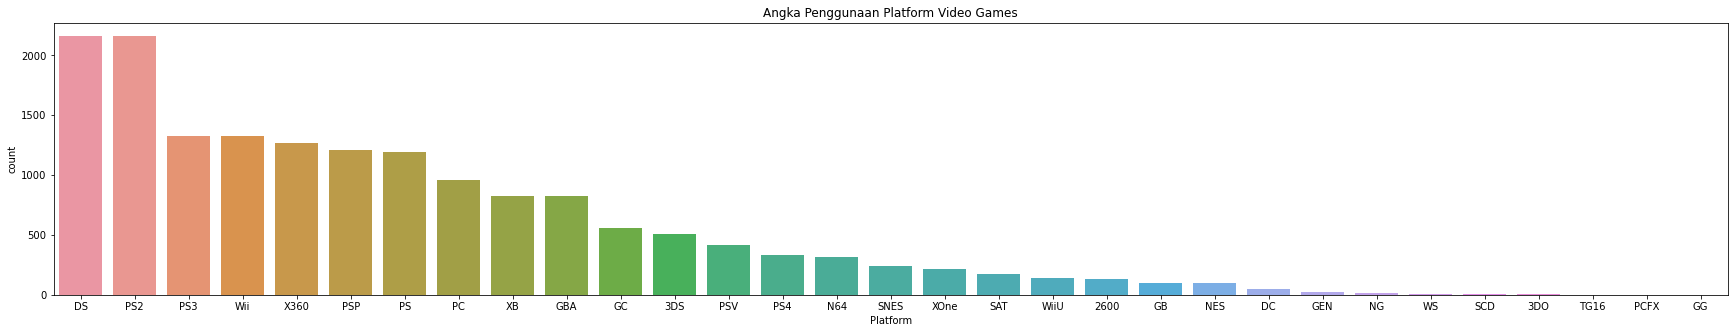

In [7]:
fig, ax = plt.subplots(figsize=(30, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="Platform", data=df, order=df.Platform.value_counts().index)

ax.set(title="Angka Penggunaan Platform Video Games")

Dapat disimpulkan, bahwa DS dan PS2 menjadi platform yang paling banyak digunakan pada video games. Sedangkan, platform SCD, WS, NG, TG16, 3DO, GG, dan PCFX cukup jarang digunakan sebagai platform. 

In [8]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Di atas merupakan detail dari grafik "Angka Penggunaan Platform Video Games"

[Text(0.5, 1.0, 'Angka Perilisan Video Games Berdasarkan Publisher')]

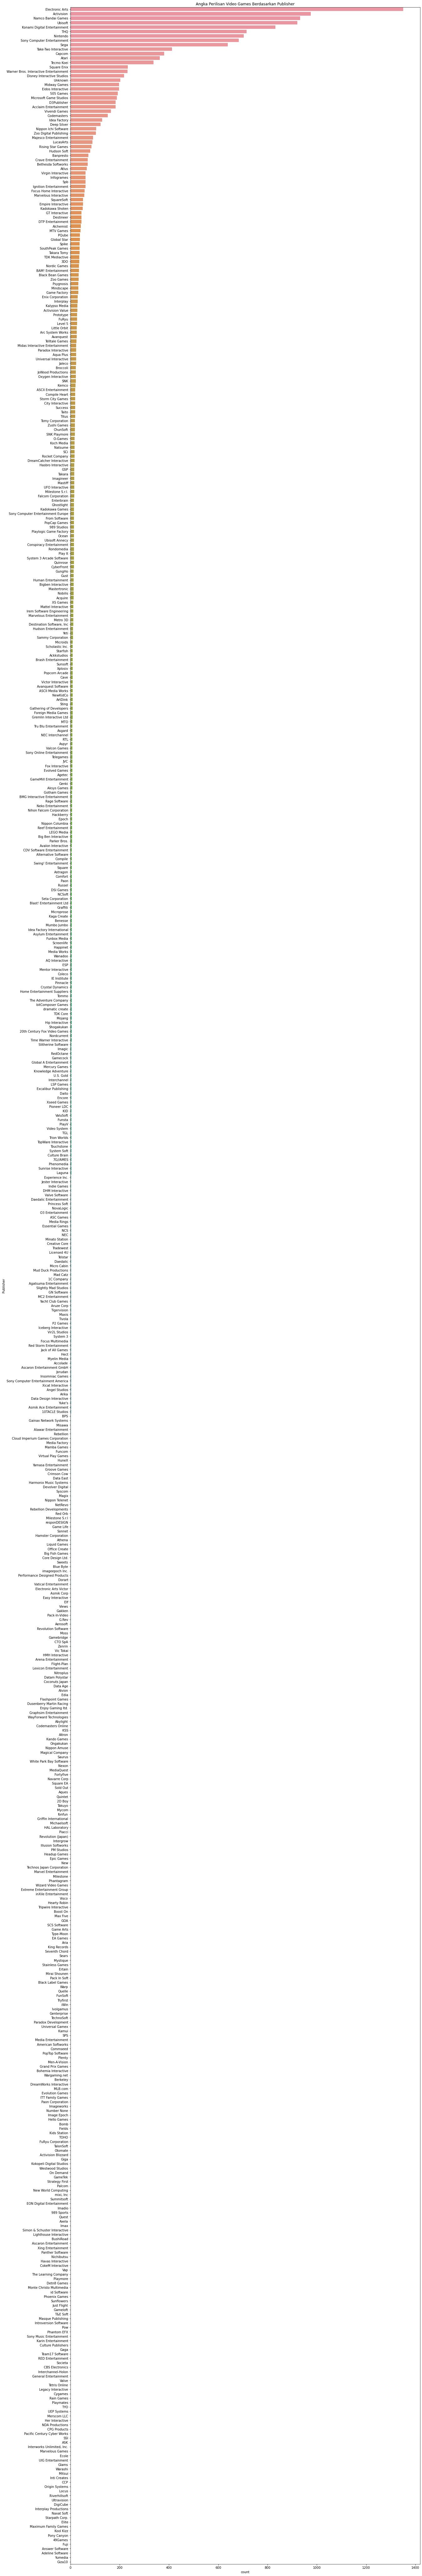

In [9]:
fig, ax = plt.subplots(figsize=(20, 150)) #atur ukuran chart
sns.countplot(ax=ax, y="Publisher", data=df, order=df.Publisher.value_counts().index)

ax.set(title="Angka Perilisan Video Games Berdasarkan Publisher")

In [10]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Fuji                               1
Answer Software                    1
Adeline Software                   1
Yumedia                            1
Giza10                             1
Name: Publisher, Length: 578, dtype: int64

Di atas merupakan detail dari grafik "Angka Perilisan Video Games Berdasarkan Publisher"

In [11]:
df[['Global_Sales']].describe()

,Global_Sales
count,16598.000000
mean,0.537441
std,1.555028
min,0.010000
25%,0.060000
50%,0.170000
75%,0.470000
max,82.740000


Dari tabel di atas, dapat ditarik kesimpulan bahwa penjualan biasanya cukup rendah karena titik maksimum penjualan berada jauh  di atas quartil 3.

Text(0.5, 1.0, 'Angka Perilisan Video Games Per Tahun')

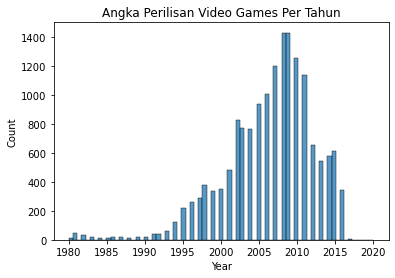

In [12]:
ax = sns.histplot(data=df, x="Year")
ax.set_title('Angka Perilisan Video Games Per Tahun')

Dapat disimpukan bahwa pada rentang tahun 1990 - 2009, perilisan video games selalu mengalami peningkatan. Sedangkan pada tahun 2010 perilisan video game mulai mengalami penurunan hingga tahun 2016, walaupun pada tahun 2014 dan 2015 mengalami kenaikan sedikit dibandingkan tahun sebelumnya.

Data penjualan yang menurun setelah tahun 2009 diasumsikan terjadi karena dampak yang diakibatkan oleh resesi ekonomi global yang terjadi pada tahun 2007-2008.

In [13]:
df[(df.Year == 2009)][["Name", "Genre", "Platform", "Publisher", "Global_Sales"]]

,Name,Genre,Platform,Publisher,Global_Sales
3,Wii Sports Resort,Sports,Wii,Nintendo,33.00
8,New Super Mario Bros. Wii,Platform,Wii,Nintendo,28.62
14,Wii Fit Plus,Sports,Wii,Nintendo,22.00
36,Call of Duty: Modern Warfare 2,Shooter,X360,Activision,13.51
45,Pokemon HeartGold/Pokemon SoulSilver,Action,DS,Nintendo,11.90
...,...,...,...,...,...
16540,15 Days,Adventure,PC,DTP Entertainment,0.01
16551,Sweet Honey Coming,Adventure,PS2,Kadokawa Shoten,0.01
16577,Damnation,Shooter,PC,Codemasters,0.01
16586,Secret Files 2: Puritas Cordis,Adventure,DS,Deep Silver,0.01


Tabel di atas merupakan pembuktian bahwa pada tahun 2009, perilisan video game mencapai titik tertinggi. 

Text(0.5, 1.0, 'Genre Perilisan Video Games Per Tahun')

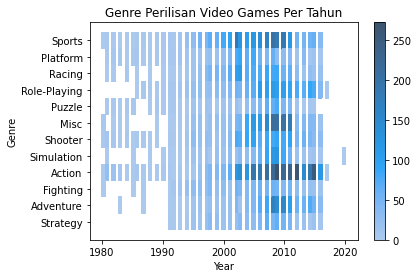

In [14]:
ax = sns.histplot(data=df, x="Year", y="Genre", cbar=True)
ax.set_title('Genre Perilisan Video Games Per Tahun')

Plot di atas merupakan visualisasi dari angka perilisan video games per tahun berdasarkan genre. Semakin gelap, maka menandakan pada tahun tersebut dirilis video games yang banyak dengan genre tersebut.

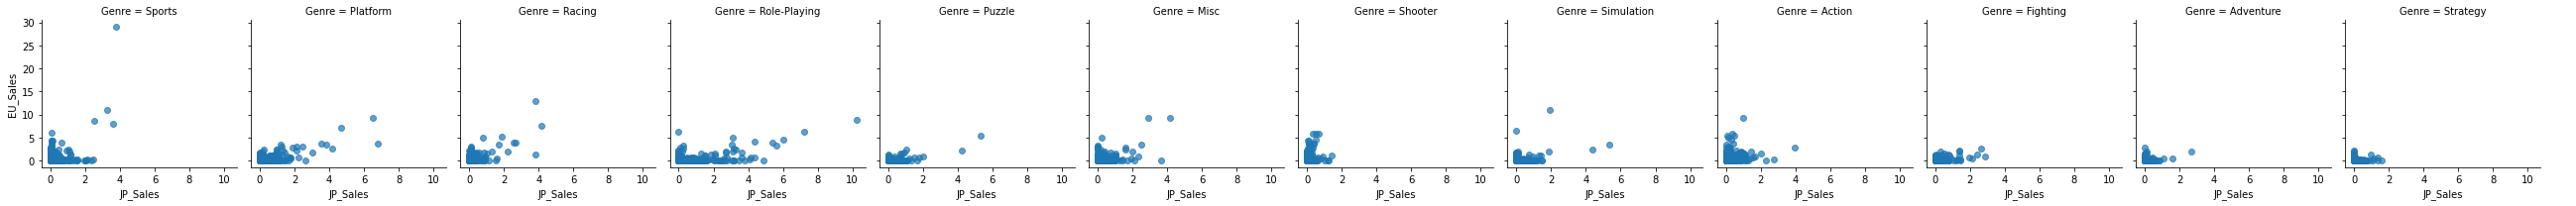

In [15]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "JP_Sales", "EU_Sales", alpha=.7)
g.add_legend();

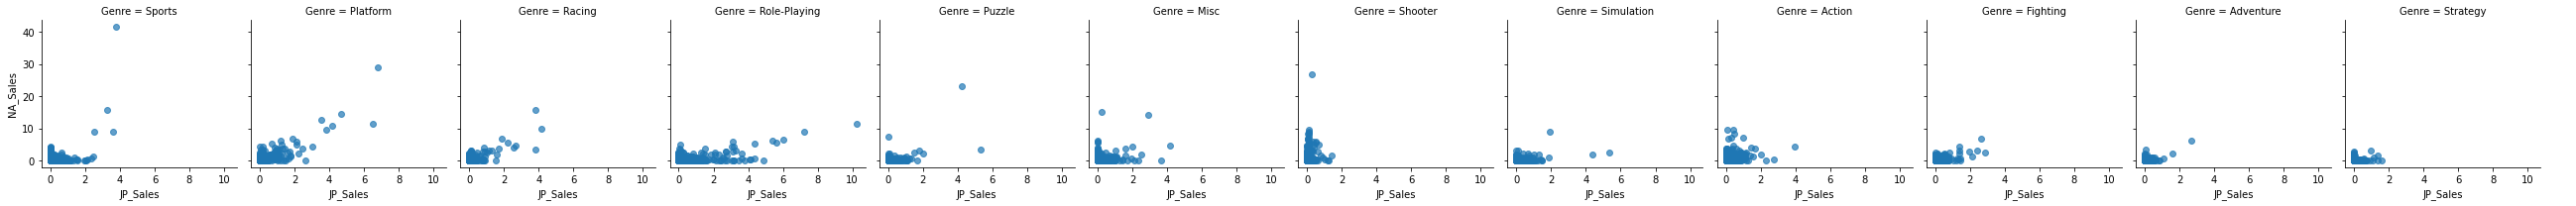

In [16]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "JP_Sales", "NA_Sales", alpha=.7)
g.add_legend();

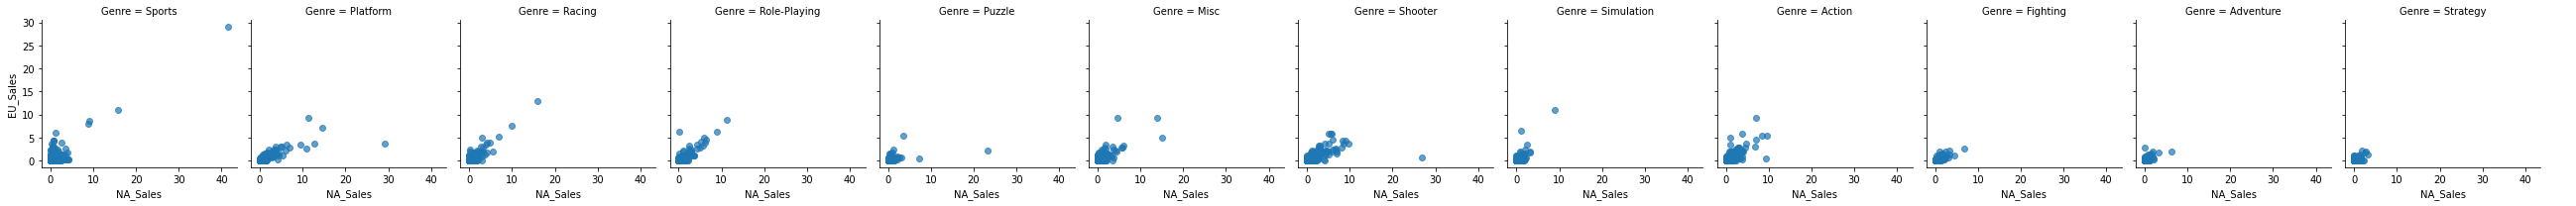

In [17]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "NA_Sales", "EU_Sales", alpha=.7)
g.add_legend();

Dari 3 grafik scatterplot di atas, yaitu penjualan JP-EU, JP-NA, dan EU-NA, dapat disimpulkan bahwa penjualan video games di jepang tidak setinggi di eropa atau north amerika.

Dari grafik penjualan di atas, berdasarkan urutan genre 3 region tersebut memiliki minat genre yang sama.

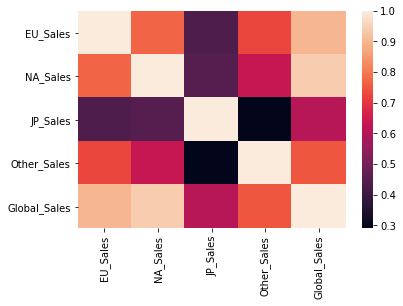

In [18]:
corr = df[["EU_Sales","NA_Sales","JP_Sales", "Other_Sales", "Global_Sales"]].corr()
ax = sns.heatmap(corr)

Korelasi antara atribut other_sales dan JP_sales menunjukkan bahwa kedua atribut tsb memiliki korelasi yang rendah (warna hitam) karena JP_Sales tidak memiliki pengaruh yg cukup besar pd atribut global_sales. Sedangkan pada atribut NA_Sales dan Global_Sales, memiliki korelasi yang cukup tinggi (warna krem muda) karena NA_Sales memiliki pengaruh yg cukup besar terhadap atribut Global_Sales. 

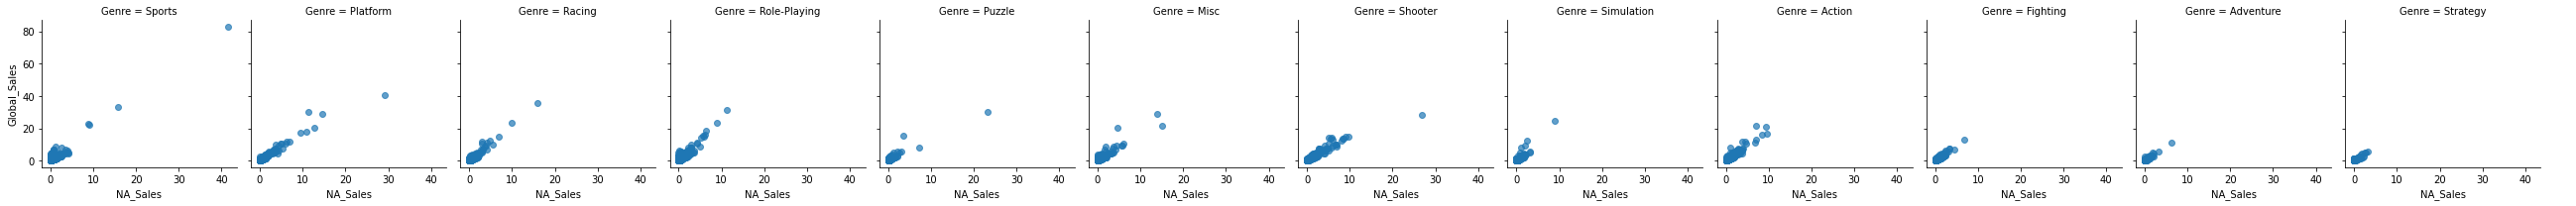

In [19]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "NA_Sales", "Global_Sales", alpha=.7)
g.add_legend();

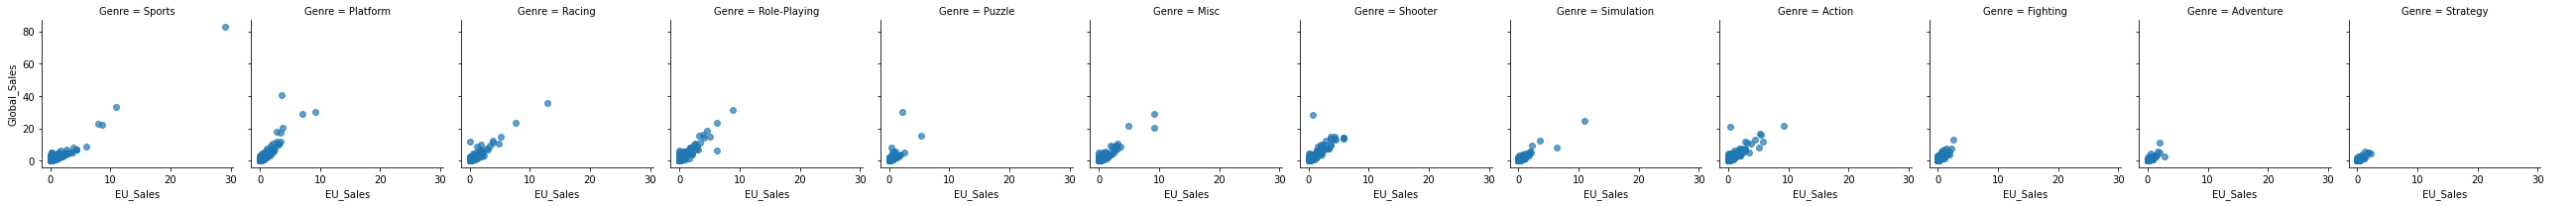

In [20]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "EU_Sales", "Global_Sales", alpha=.7)
g.add_legend();

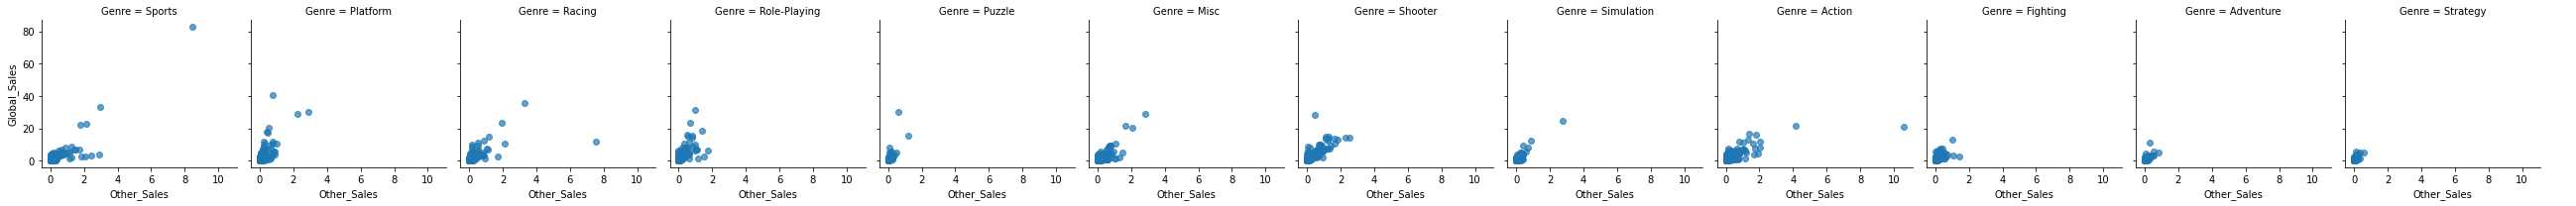

In [21]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "Other_Sales", "Global_Sales", alpha=.7)
g.add_legend();

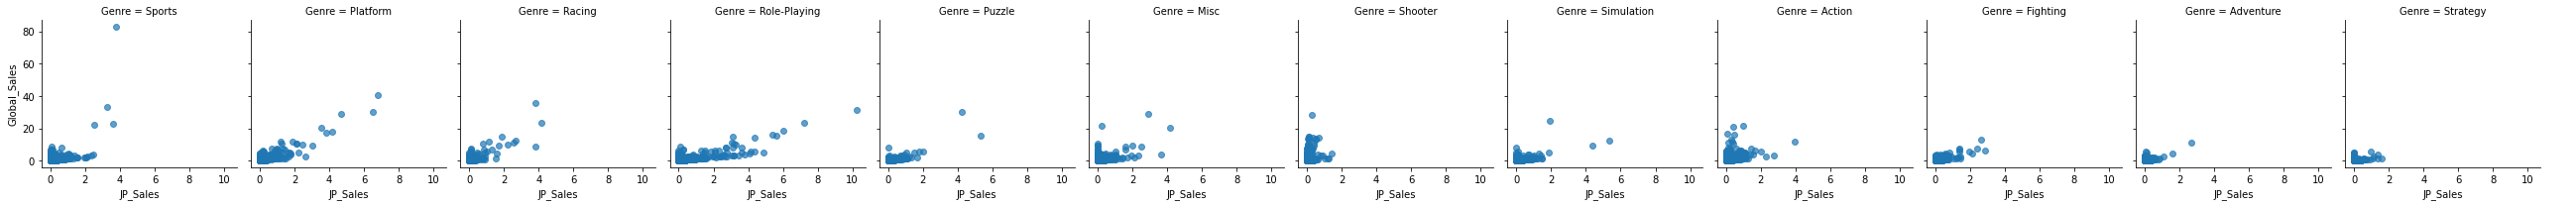

In [22]:
g = sns.FacetGrid(df, col="Genre")
g.map(plt.scatter, "JP_Sales", "Global_Sales", alpha=.7)
g.add_legend();

Dari 4 grafik scatterplot di atas, dapat disimpulkan bahwa NA_Sales memiliki kontribusi yang paling besar pada Global_Sales dibanding penjualan lainnya. Dibandingkan dengan 3 grafik yang lain, terlihat jelas perbedaan dari pola scatterplot-nya.

Text(0.5, 1.0, 'Penjualan Global Berdasarkan Genre Perilisan Video Games Per Tahun')

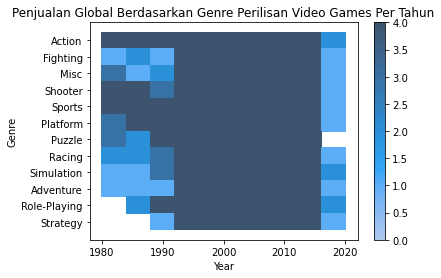

In [23]:
ay = df.groupby(["Year", "Genre"])["Global_Sales"].sum()
ax = sns.histplot(data=ay, x="Year", y="Genre", cbar=True)
ax.set_title('Penjualan Global Berdasarkan Genre Perilisan Video Games Per Tahun')

Plot di atas merupakan hist plot dari jumlah kumulatif penjualan global. Semakin gelap, maka menandakan penjualan pada tahun dan genre tersebut banyak. Penyebab warna kolom antara tahun 1990-sekitar 2016 sama adalah range skalanya terlalu kecil.

Persentase Kontribsi Penjualan
NA_Sales    : 49.25%
EU_Sales    : 27.29%
JP_Sales    : 14.47%
Other_Sales : 8.94%
Global_Sales : 100.00%


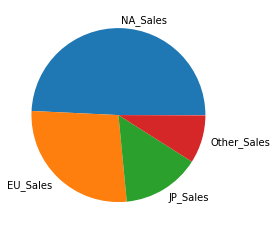

In [24]:
av=df["NA_Sales"].sum()/df["Global_Sales"].sum()
aw=df["EU_Sales"].sum()/df["Global_Sales"].sum()
ax=df["JP_Sales"].sum()/df["Global_Sales"].sum()
ay=df["Other_Sales"].sum()/df["Global_Sales"].sum()
az=df["Global_Sales"].sum()/df["Global_Sales"].sum()

print ("Persentase Kontribsi Penjualan")
print ("NA_Sales    : {:.2%}". format(av))
print ("EU_Sales    : {:.2%}". format(aw))
print ("JP_Sales    : {:.2%}". format(ax))
print ("Other_Sales : {:.2%}". format(ay))
print ("Global_Sales : {:.2%}". format(az))

y = np.array([format(av), format(aw), format(ax), format(ay)])
mylabels = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

plt.pie(y, labels = mylabels, normalize=False )
plt.show() 

Plot di atas memvisualisasikan seberapa besar penjualan per region berkontribusi pada penjualan global

In [25]:
df3 = df.groupby(['Genre'])['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales'].apply(sum)

print (df3)

              NA_Sales  JP_Sales  EU_Sales  Other_Sales
Genre                                                  
Action          877.83    159.95    525.00       187.38
Adventure       105.80     52.07     64.13        16.81
Fighting        223.59     87.35    101.32        36.68
Misc            410.24    107.76    215.98        75.32
Platform        447.05    130.77    201.63        51.59
Puzzle          123.78     57.31     50.78        12.55
Racing          359.42     56.69    238.39        77.27
Role-Playing    327.28    352.31    188.06        59.61
Shooter         582.60     38.28    313.27       102.69
Simulation      183.31     63.70    113.38        31.52
Sports          683.35    135.37    376.85       134.97
Strategy         68.70     49.46     45.34        11.36


<ipython-input-25-6c18bc851f7b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df.groupby(['Genre'])['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales'].apply(sum)


Pada plot ini awalnya bertujuan untuk memperlihatkan genre video games dengan tingkat penjualan tertinggi per region-nya, sehingga dapat diketahui tren genre video games di setiap region.

In [26]:
df3 = df[df.Genre=='Action'].groupby(['Year', 'Genre'])['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales'].sum().reset_index()
print (df3)

      Year   Genre  NA_Sales  JP_Sales  EU_Sales  Other_Sales
0   1980.0  Action      0.32      0.00      0.02         0.00
1   1981.0  Action     13.86      0.00      0.81         0.12
2   1982.0  Action      6.07      0.00      0.38         0.05
3   1983.0  Action      2.67      0.00      0.17         0.02
4   1984.0  Action      0.80      0.83      0.19         0.03
5   1985.0  Action      1.64      1.44      0.38         0.06
6   1986.0  Action      6.52      5.31      1.66         0.25
7   1987.0  Action      1.04      0.00      0.06         0.01
8   1988.0  Action      1.15      0.42      0.16         0.01
9   1989.0  Action      3.83      0.31      0.46         0.05
10  1990.0  Action      4.27      1.01      0.97         0.14
11  1991.0  Action      3.47      2.06      1.08         0.15
12  1992.0  Action      2.21      0.54      0.96         0.13
13  1993.0  Action      0.64      0.92      0.22         0.03
14  1994.0  Action      0.57      0.84      0.12         0.02
15  1995

<ipython-input-26-7aeb8b59cd94>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df[df.Genre=='Action'].groupby(['Year', 'Genre'])['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales'].sum().reset_index()


In [27]:
df3 = df[df.Genre=='Role-Playing'].groupby(['Year', 'Genre'])['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales'].sum().reset_index()
print (df3)

      Year         Genre  NA_Sales  JP_Sales  EU_Sales  Other_Sales
0   1986.0  Role-Playing      0.49      0.52      0.00         1.51
1   1987.0  Role-Playing      0.47      4.18      0.00         0.00
2   1988.0  Role-Playing      0.10      5.78      0.00         0.00
3   1989.0  Role-Playing      0.00      2.20      0.00         0.00
4   1990.0  Role-Playing      0.08      4.42      0.00         0.02
5   1991.0  Role-Playing      0.24      2.81      0.09         0.12
6   1992.0  Role-Playing      0.00      6.83      0.00         0.03
7   1993.0  Role-Playing      0.25      5.25      0.07         0.02
8   1994.0  Role-Playing      0.86      6.23      0.00         0.04
9   1995.0  Role-Playing      0.71     13.09      0.30         0.17
10  1996.0  Role-Playing     12.78     18.78     11.04         1.39
11  1997.0  Role-Playing      5.31     11.56      3.44         1.51
12  1998.0  Role-Playing      9.16     11.33      6.44         1.16
13  1999.0  Role-Playing     17.29     18.70    

<ipython-input-27-bf77d52c85c3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df[df.Genre=='Role-Playing'].groupby(['Year', 'Genre'])['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales'].sum().reset_index()


In [ ]:
# Memanggil model Decision Tree yang ditampung pada variabel clf_DT. Sesuaikan dengan data X_train (data frame tanpa atribut 
#      fraud) dan Y_train (data frame yang berisi atribut fraud dengan nilai 0 dan 1)
clf_DT = tree.DecisionTreeClassifier()           
clf_DT.fit(X_train, Y_train)                     

# Menyimpan prediksi dari X_test (data test tanpa atribut fraud). Menyimpan nilai akurasi yang diperoleh dari hasil prediksi 
#      yang dites dengan Y_test
Y_pred = clf_DT.predict(X_test)                
acc = accuracy_score(Y_test, Y_pred)             

# Menampilkan output akurasi. Menampikan hasil klasifikasi

print("Akurasi {}".format(acc))                   
print(classification_report(Y_test, Y_pred))    

# Menampilkan output confusion matrix
print(confusion_matrix(Y_test, Y_pred))

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Feature Importances~~~~~~~~~~~~~~~~~~~~\n\n")

# Syntax di bawah digunakan untuk menghitung tingkat kepentingan atribut (hasil klasifikasi Random Forest) berdasarkan atribut 
#     yang ada di X_train, lalu diurutkan secara menurun 
feature_importances = pd.DataFrame(clf_DT.feature_importances_,index = X_train.columns, columns=['importance'])
.sort_values('importance',ascending=False)

# Menampilkan hasil tingkat kepentingan atribut
print(feature_importances)   

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~\n\n")

# Deklarasi fungsi untuk menampilkan precision, recall, f1-score, dan confusion matrix pada tiap cross validation
def classification_report_with_f1_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) #precision, recall, dan f1-score
    print(confusion_matrix(y_true, y_pred)) #confusion matrix
    return f1_score(y_true, y_pred)

# menentukan value cross validation
scores = cross_val_score(clf_DT, X=X, y=Y, cv=4, 

#menampilkan output pada fungsi classification_report_with_f1_score
scoring=make_scorer(classification_report_with_f1_score)) 

#menampilkan output f1-score untuk tiap cross validation
print(scores) 